In [15]:
import torch
import cv2
import matplotlib.pyplot as plt
data = torch.load('datasets/64skulldataset.pt')
olddata = torch.load('datasets/64dataset.pt')
from matplotlib import gridspec

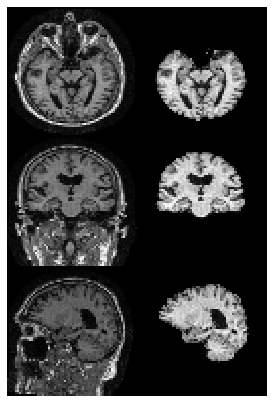

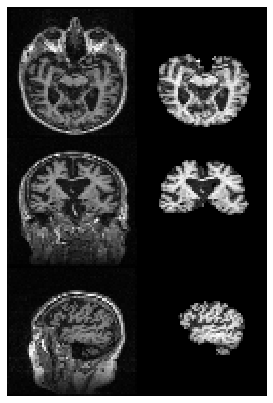

In [4]:
fig = plt.figure(figsize=(8, 12)) 

gs = gridspec.GridSpec(3, 2, width_ratios=[1, 1],
         wspace=0.0, hspace=0.0, top=0.5, bottom=0.05, left=0.17, right=0.62) 

for i in range(3):
    ax= plt.subplot(gs[i,0])
    ax.imshow(olddata[1000][0][i][0],cmap = 'gray')
    plt.axis('off')

for i in range(3):
    ax= plt.subplot(gs[i,1])
    ax.imshow(data[1000][0][i][0],cmap = 'gray')
    plt.axis('off')

plt.show()


fig = plt.figure(figsize=(8, 12)) 

gs = gridspec.GridSpec(3, 2, width_ratios=[1, 1],
         wspace=0.0, hspace=0.0, top=0.5, bottom=0.05, left=0.17, right=0.62) 

for i in range(3):
    ax= plt.subplot(gs[i,0])
    ax.imshow(olddata[12][0][i][0],cmap = 'gray')
    plt.axis('off')

for i in range(3):
    ax= plt.subplot(gs[i,1])
    ax.imshow(data[12][0][i][0],cmap = 'gray')
    plt.axis('off')

plt.show()

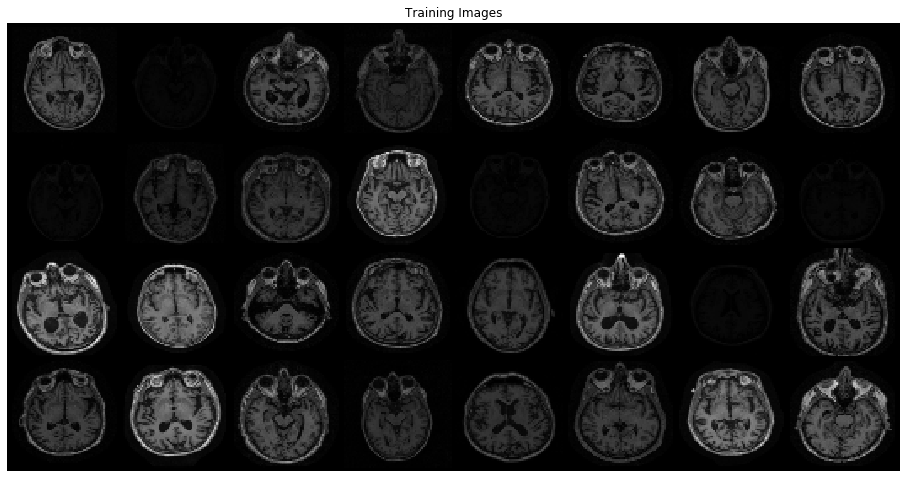

In [7]:
import torchvision
from torch.utils.data import Dataset, DataLoader
dataloader = DataLoader(olddata, batch_size=32,shuffle=True, num_workers=4)
batch = next(iter(dataloader))
plt.figure(figsize=(16,16))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(
    torchvision.utils.make_grid(batch[0][0], padding=2, normalize=True),(1,2,0)))
plt.show()

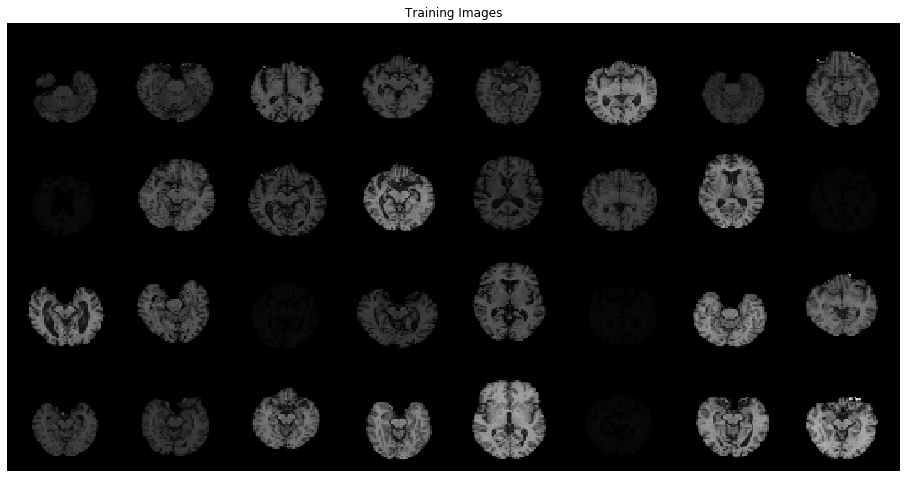

In [6]:
import torchvision
from torch.utils.data import Dataset, DataLoader
dataloader = DataLoader(data, batch_size=32,shuffle=True, num_workers=4)
batch = next(iter(dataloader))
plt.figure(figsize=(16,16))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(
    torchvision.utils.make_grid(batch[0][0], padding=2, normalize=True),(1,2,0)))
plt.show()

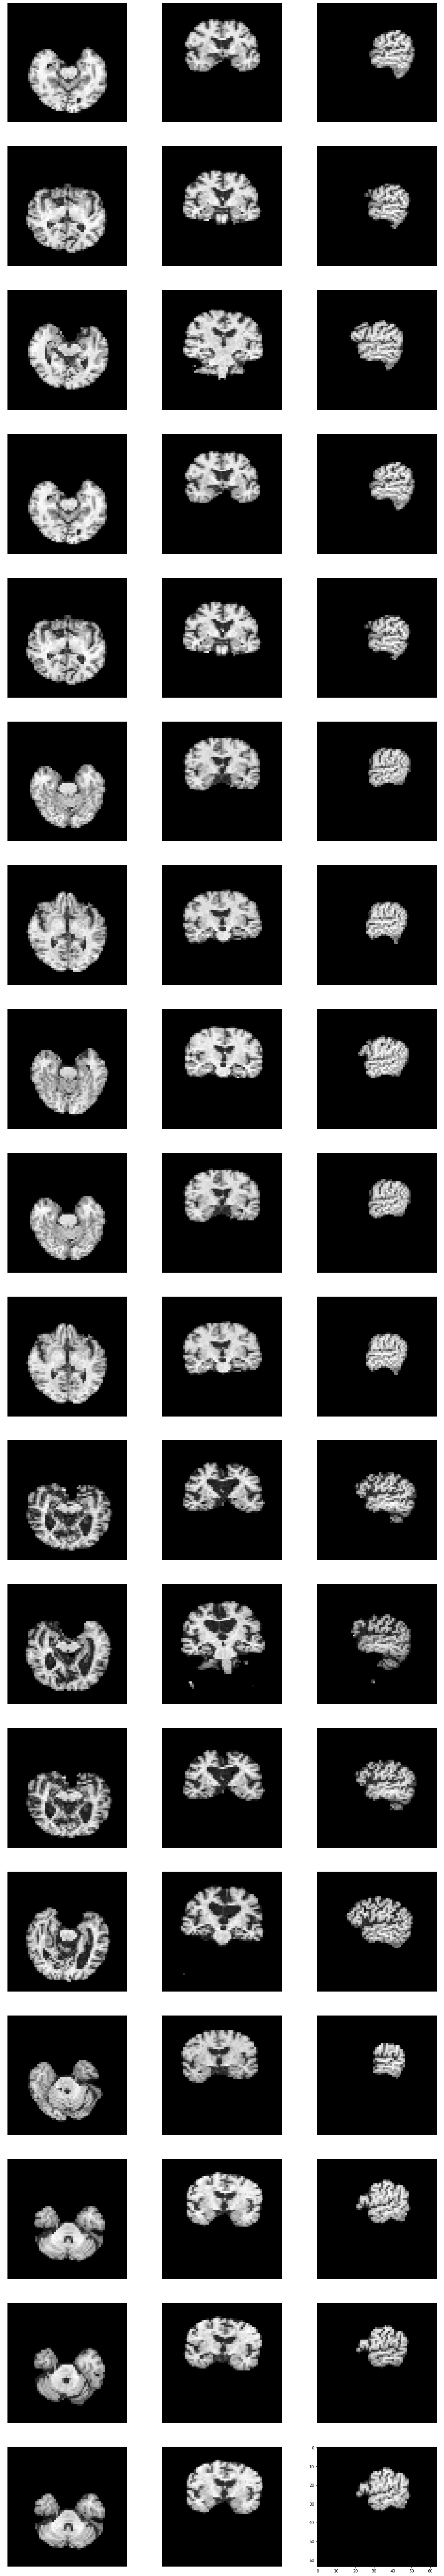

In [8]:
fig = plt.figure(figsize = (20,120))
num = 1
for i in range(18):
    for s in range(3):
        plt.axis("off")
        y = fig.add_subplot(18, 3, num)    
        y.imshow(data[i][0][s][0], cmap = 'gray')
        num += 1

plt.show()

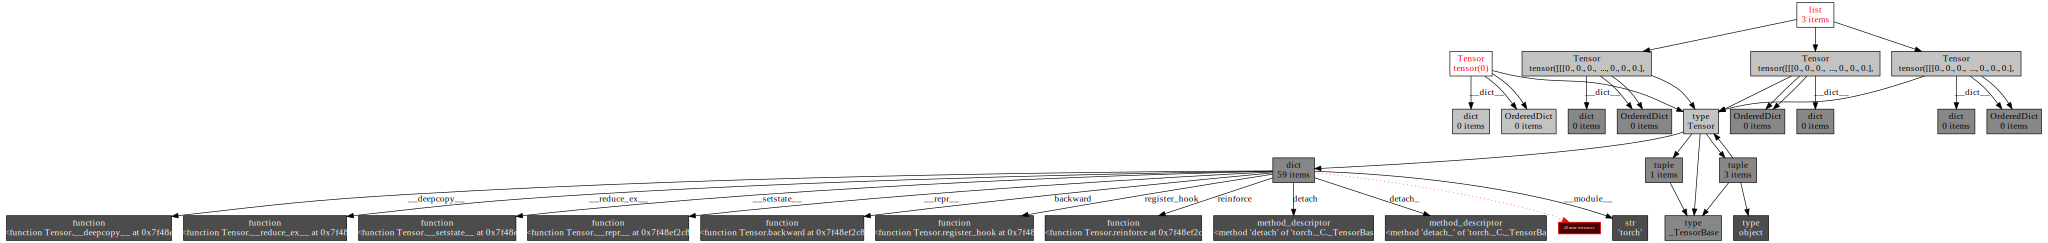

In [12]:
import objgraph
objgraph.show_refs(data[0], filename='datastructure.png')


In [28]:
from lolviz import *
data = data
g = lolviz(data[:30])
print(g.source) # if you want to see the graphviz source
g.view() # render and show graphviz.files.Source object


    digraph G {
        nodesep=.05;
        ranksep=.4;
        rankdir=LR;
        node [penwidth="0.5", shape=box, width=.1, height=.1];

    node139951037161712 [color="#444443", margin="0.02", fontcolor="#444443", fontname="Helvetica", style=filled, fillcolor="#cfe2d4", label=<<table BORDER="0" CELLPADDING="0" CELLBORDER="0" CELLSPACING="0">
<tr><td port="0" BORDER="1" cellpadding="2" cellspacing="0" sides="b" bgcolor="#cfe2d4" align="left"><font color="#444443" point-size="9">0</font></td>
</tr>
<tr><td port="1" BORDER="1" cellpadding="2" cellspacing="0" sides="b" bgcolor="#cfe2d4" align="left"><font color="#444443" point-size="9">1</font></td>
</tr>
<tr><td port="2" BORDER="1" cellpadding="2" cellspacing="0" sides="b" bgcolor="#cfe2d4" align="left"><font color="#444443" point-size="9">2</font></td>
</tr>
<tr><td port="3" BORDER="1" cellpadding="2" cellspacing="0" sides="b" bgcolor="#cfe2d4" align="left"><font color="#444443" point-size="9">3</font></td>
</tr>
<tr><td port="4" B

'Source.gv.pdf'

In [79]:
epoch = 100
input_shape = (1, 64, 64)
dataset_name = 'CycleGAN1'

G_AB = GeneratorResNet(input_shape, 9).cuda()
G_BA = GeneratorResNet(input_shape, 9).cuda()
G_AB.load_state_dict(torch.load("saved_models/%s/G_AB_%d.pth" % (dataset_name, epoch)))
G_BA.load_state_dict(torch.load("saved_models/%s/G_BA_%d.pth" % (dataset_name, epoch)))

for imgs in tqdm(NCset1):

    G_AB.eval()
    
    real_A = torch.unsqueeze(Variable(imgs.type(torch.cuda.FloatTensor)), 0)
    fake_B = torch.squeeze(G_AB(real_A))
    fake_B = fake_B.detach().cpu()

    plt.imshow(fake_B, cmap = 'gray')
    plt.show()